<span style="font-size: 35px; font-family: Times New Roman, sans-serif;"><b>Amazon Sales Data Analysis: Insights for Merchants</span></br></br></br>
 
<span style="font-size: 24px; font-family: Times New Roman, sans-serif;"><b>Introduction</span></br>

    
<span style="font-size: 17px; font-family: Times New Roman, sans-serif;"><b>Amazon, Inc.</b> is a prominent e-commerce platform where merchants from around the world engage in selling a diverse range of products. As part of their business operations, merchants often export their sales data from the Amazon portal for further analysis. In this project, we aim to conduct a comprehensive analysis of the sales data obtained from the merchant's Amazon account, stored in the 'sales_data.xlsx' file.</span></br></br>
    
    
    
<span style="font-size: 24px; font-family: Times New Roman, sans-serif;"><b>Table of Contents</span></br>

<span style="font-size: 17px; font-family: Times New Roman, sans-serif;">&#8226; Import Necessary Libraries</br>
&#8226; Data Understanding</br>
&#8226; Data Preparation</br>
&#8226; Exploratory Data Analysis</br>
&#8226; Conclusions</br>
</span>


<span style="font-size: 24px; font-family: Times New Roman, sans-serif;"><b>Import Necessary Libraries</span></br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

sns.set_style("darkgrid")

In [3]:
# Read data in xlsx format

df = pd.read_excel(r'C:\Users\aakru\OneDrive\Desktop\Python Projects\Amazon Sales Project\sales_data.xlsx')

<span style="font-size: 24px; font-family: Times New Roman, sans-serif;"><b>Data Understanding</span></br>

 
<span style="font-size: 17px; font-family: Times New Roman, sans-serif;">
&#8226; head and tail</br>
&#8226; sample</br>
&#8226; Dataframe shape</br>
&#8226; size</br>
&#8226; columns</br>
&#8226; dtypes</br>
&#8226; info</br>
&#8226; describe</br>
</span>

In [4]:
# Preview the first 5 rows of dataset
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,0.0,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,Blouse,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,0.0,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,Blouse,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,1.0,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Dress,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,0.0,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,0.0,NaN


In [5]:
#Preview the last 5 rows of dataset
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,Blouse,...,1,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,NaN,0.0,NaN
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,1,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,0.0,NaN
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Dress,...,1,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,NaN,0.0,NaN
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,1,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,0.0,NaN
128974,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,1,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,0.0,NaN


In [6]:
# to see any random rows to ensure about the data quality
df.sample(5, random_state=12345)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
123378,123378,404-0167012-7961110,2006-04-22 00:00:00,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0207,J0207-DR-XS,Dress,...,1,INR,1229.0,PUNE,MAHARASHTRA,411002.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,0.0,Easy Ship
13984,13984,408-0837991-4232344,04-22-22,Shipped,Amazon,Amazon.in,Expedited,SET268,SET268-KR-NP-M,Set,...,1,INR,788.0,NEW DELHI,DELHI,110077.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,0.0,NaN
12378,12378,403-9933698-2493909,04-23-22,Shipped,Amazon,Amazon.in,Expedited,JNE3465,JNE3465-KR-XXL,Blouse,...,1,INR,486.0,HYDERABAD,TELANGANA,500086.0,IN,NaN,0.0,NaN
63489,63489,407-1149267-8904355,05-20-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0234,J0234-SKD-XL,Set,...,1,INR,1186.0,MUMBAI,MAHARASHTRA,400006.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,0.0,Easy Ship
97152,97152,407-9659008-0469123,06-24-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3459,JNE3459-KR-XXL,Blouse,...,1,INR,399.0,BENGALURU,KARNATAKA,560003.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,0.0,Easy Ship


In [7]:
# shape of dataset
df.shape

(128975, 23)

In [8]:
# all columns of dataset
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')

In [9]:
# the summary of the dataset
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [10]:
# the descriptive statistics summary 
df.describe()

,index,Qty,Amount,ship-postal-code,B2B
count,128975.000000,128975.000000,121180.000000,128935.000000,128968.000000
mean,64487.000000,0.904431,648.561465,463963.108256,0.006754
std,37232.019822,0.313354,281.211687,191475.865632,0.081903
min,0.000000,0.000000,0.000000,110001.000000,0.000000
25%,32243.500000,1.000000,449.000000,382421.000000,0.000000
50%,64487.000000,1.000000,605.000000,500033.000000,0.000000
75%,96730.500000,1.000000,788.000000,600024.000000,0.000000
max,128974.000000,15.000000,5584.000000,989898.000000,1.000000


<span style="font-size: 24px; font-family: Times New Roman, sans-serif;"><b>Data Preparation</span></br>

 
<span style="font-size: 17px; font-family: Times New Roman, sans-serif;">
&#8226; Identifying missing values</br>
&#8226; Dropping irrelevant columns and rows</br>
&#8226; Identifying duplicated columns</br>
&#8226; Renaming columns</br>
&#8226; Feature Creation</br>
</span>

In [11]:
# the number of missing values

df.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               40
ship-postal-code         40
ship-country             40
promotion-ids         49160
B2B                       7
fulfilled-by          89699
dtype: int64

<span style="font-size: 24px; font-family: Times New Roman, sans-serif;"><b>Cleaning Data</span></br></br>


<span style="font-size: 17px; font-family: Times New Roman, sans-serif;">
 <b>1. Fulfilled-by and promotion IDs :</b> There is larger number of missing values in the 'Fulfilled By' and 'Promotion IDs' columns. Due to the significant impact on data integrity and the impracticality of removing a large number of rows, it is decided to drop both columns.</br>(Also removing index column with it)</br>

<b>2. Amount Column :</b> The 'Amount' column is crucial for analysis, and rows with missing amounts will be removed.</br>

<b>3. Courier Status Column:</b> NaN values in the 'Courier Status' column were identified as indicative of canceled orders. To capture the significance of cancellations in the analysis, NaN values were replaced with the label 'Cancelled,' ensuring a more accurate assessment of canceled order percentages.</br>

<b>4. Rename Columns:</b> Let's rename few columns and fill Nan values for those columns. 

</span>

In [12]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,0.0,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,Blouse,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,0.0,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,Blouse,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,1.0,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Dress,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,0.0,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,Blouse,...,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,0.0,NaN
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,0.0,NaN
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Dress,...,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,0.0,NaN
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,1,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,0.0,NaN


In [13]:
# Drop Fulfilled By and Promotion IDs columns

df.drop(['index', 'promotion-ids', 'fulfilled-by'], axis=1, inplace=True)

# Remove rows with missing values in the Amount column

df.dropna(subset=['Amount'], inplace=True)

# Replace NaN values in 'Courier Status' with 'Cancelled'

df['Courier Status'].fillna('Cancelled', inplace=True)

# Replace NaN values in specified columns with 'Unknown'

columns_to_replace = ['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']
df[columns_to_replace] = df[columns_to_replace].fillna('Unknown')

#Re-name those columns

df.rename(columns={'ship-city': 'City', 'ship-state': 'State', 'ship-postal-code': 'Postal Code', 
                   'ship-country': 'Country', 'currency': 'Currency', 'ship-service-level': 'Shipment Type'}, inplace=True)


In [14]:
df

,Order ID,Date,Status,Fulfilment,Sales Channel,Shipment Type,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Currency,Amount,City,State,Postal Code,Country,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Cancelled,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,0.0
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,Blouse,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,0.0
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,Blouse,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,1.0
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Dress,L,B099NRCT7B,Cancelled,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,0.0
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,Blouse,XL,B098112V2V,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,0.0
128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,0.0
128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Dress,XXL,B0982YZ51B,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,0.0
128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,0.0


In [15]:
# the data type of the Date column is converted to "datetime64" 

# Date_year and Date_month are created.

df = df.assign(
     Date = df["Date"].astype("datetime64[ns]"),
     Year = lambda x: x["Date"].dt.year,
     Month = lambda x: x["Date"].dt.strftime('%b')  
)



month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Map the numeric month to month names using the dictionary
df['Month'] = df['Month'].map(month_mapping)


In [16]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,Shipment Type,Style,SKU,Category,Size,...,Qty,Currency,Amount,City,State,Postal Code,Country,B2B,Year,Month
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,0.0,2022,NaN
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,Blouse,3XL,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,0.0,2022,NaN
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,Blouse,XL,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,1.0,2022,NaN
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Dress,L,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,0.0,2022,NaN
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,0.0,2022,NaN


<span style="font-size: 24px; font-family: Times New Roman, sans-serif;"><b>Exploratory Data Analysis</span></br>

<span style="font-size: 17px; font-family: Times New Roman, sans-serif;">To focus on the most recent data and gain insights into the trends for the year 2022, will take a subset of the original dataset. The dataset will be filter to include only records from the year 2022.</span>


In [17]:
# Filter the Dataframe for the year 2022

df_2022 = df[df['Year'] == 2022].copy()

#Drop the Year column as now it is not required 

df_2022.drop('Year', axis=1, inplace=True)

Sales Distribution by Category:

Question: Which product categories contribute the most to the sales in 2022?

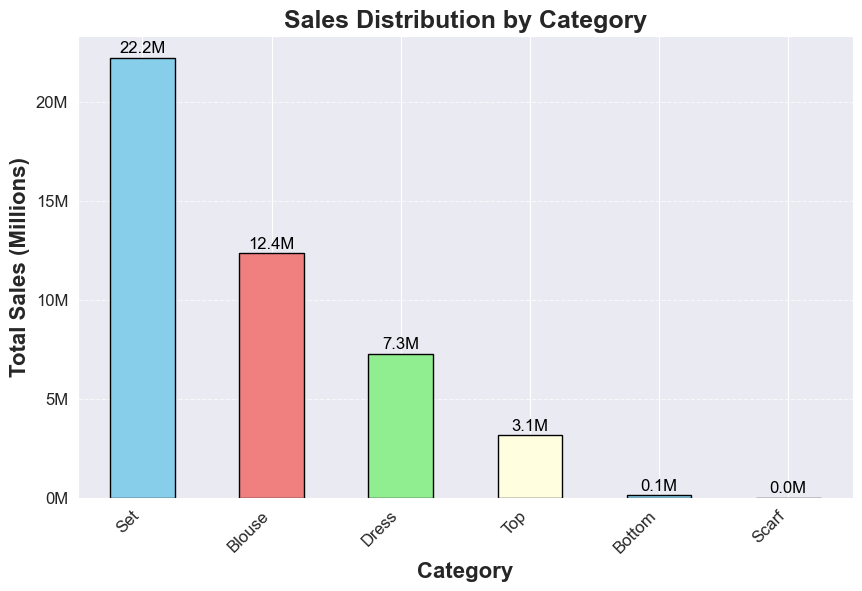

In [18]:
# Group data by category and calculate total sales for each category
category_sales = df_2022.groupby('Category')['Amount'].sum()

# Convert total sales to millions
category_sales_million = category_sales / 1_000_000

# Define a custom formatter to display values in millions
def millions_formatter(x, pos):
    return f'{x:.0f}M'

# Create a color palette for the bars
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightyellow']

# Create a bar chart with enhanced appearance
plt.figure(figsize=(10, 6))
ax = category_sales_million.sort_values(ascending=False).plot(kind='bar', color=colors, edgecolor='black')

# Add data labels
for i, value in enumerate(category_sales_million.sort_values(ascending=False)):
    ax.text(i, value + 0.1, f'{value:.1f}M', ha='center', va='bottom', fontsize=12, color='black')

# Customize chart aesthetics
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Sales Distribution by Category', fontsize=18, fontweight='bold')
plt.xlabel('Category', fontsize=16, fontweight='bold')
plt.ylabel('Total Sales (Millions)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



Fulfillment and Shipment Analysis:

Question: How do different fulfillment methods and shipment types impact sales?


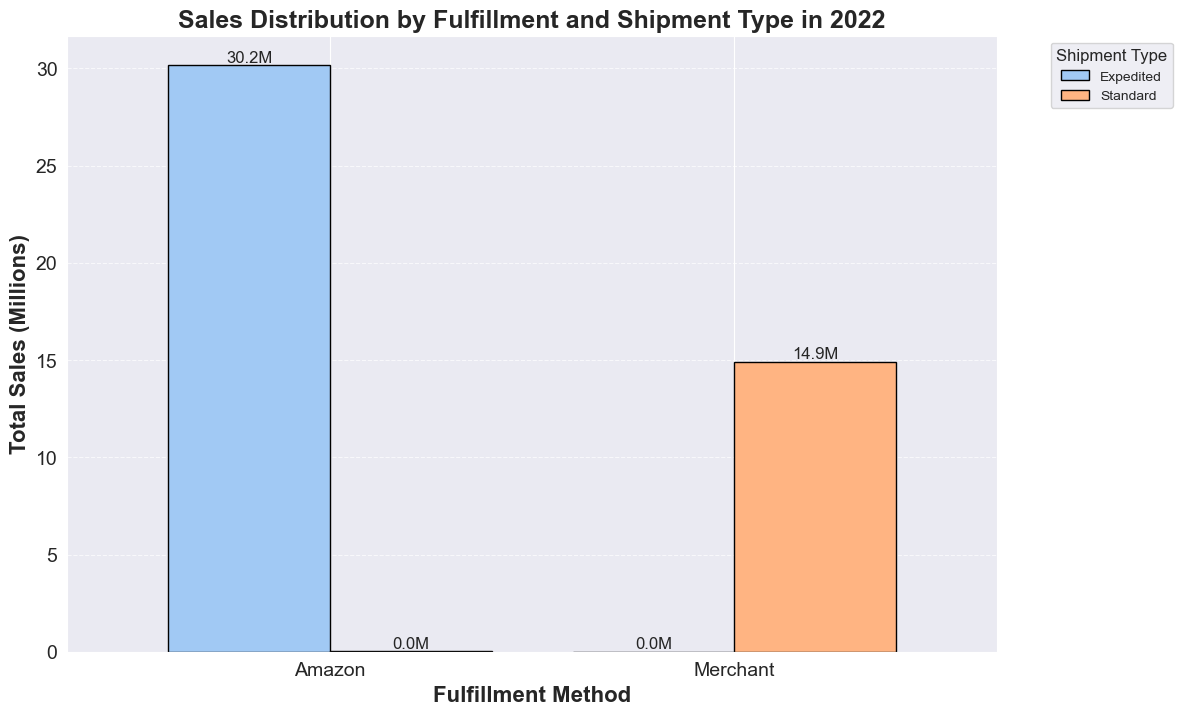

In [19]:
# Group data by fulfillment and shipment type and calculate total sales for each combination
fulfillment_shipment_sales = df_2022.groupby(['Fulfilment', 'Shipment Type'])['Amount'].sum()

# Convert total sales to millions
fulfillment_shipment_sales_million = fulfillment_shipment_sales / 1_000_000

# Set a custom color palette
colors = sns.color_palette("pastel")

# Create a grouped bar chart with data labels
ax = fulfillment_shipment_sales_million.unstack().plot(kind='bar', figsize=(12, 8), width=0.8, color=colors, edgecolor='black')

# Add data labels in millions
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%.1fM', fontsize=12)

# Customize chart aesthetics
plt.title('Sales Distribution by Fulfillment and Shipment Type in 2022', fontsize=18, fontweight='bold')
plt.xlabel('Fulfillment Method', fontsize=16, fontweight='bold')
plt.ylabel('Total Sales (Millions)', fontsize=16, fontweight='bold')
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Shipment Type', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Top Selling Products:

Question: What are the top-selling products in terms of quantity or revenue?

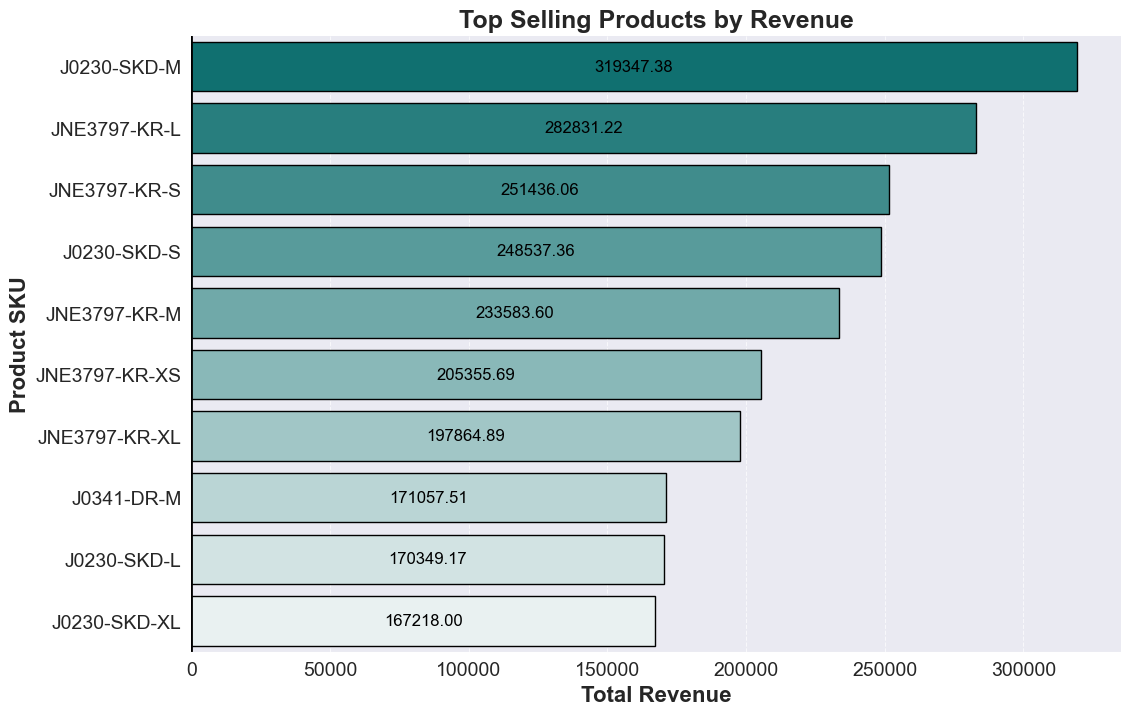

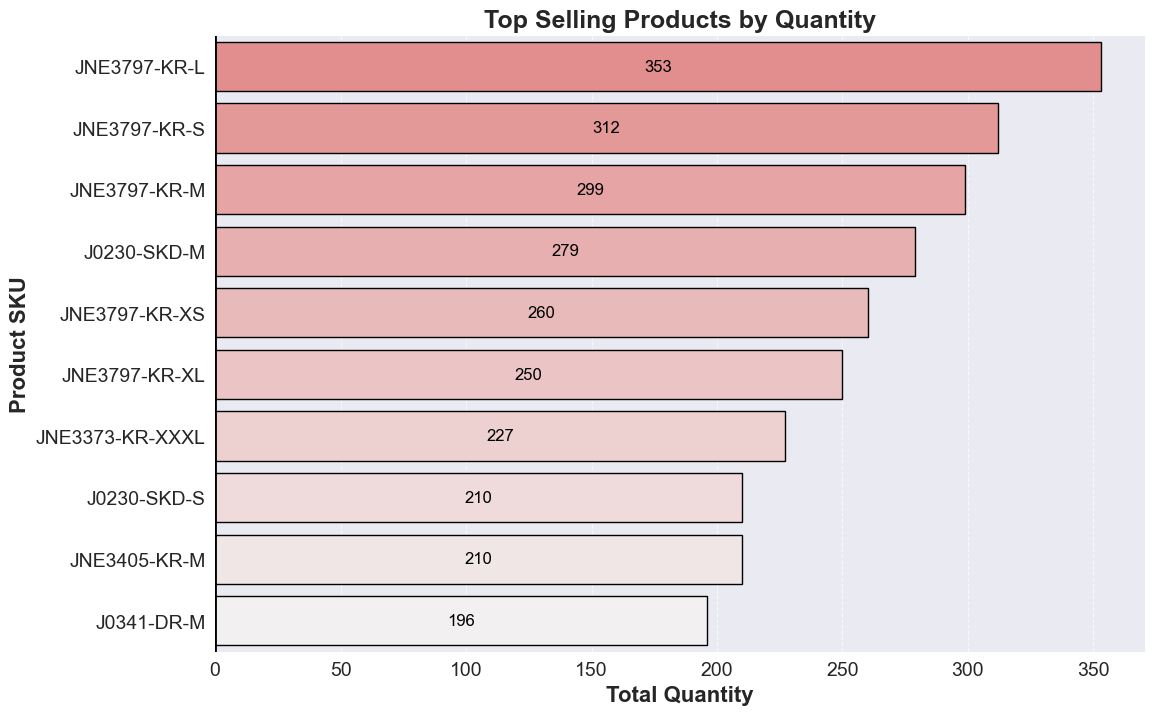

In [20]:
def top_selling_products(df_2022, top_by='Revenue', n=10):
    # Replace 'Quantity' and 'Revenue' with the actual column names in your DataFrame
    if top_by == 'Revenue':
        top_products = df_2022.groupby('SKU')['Amount'].sum().nlargest(n)
        color_palette = sns.light_palette("teal", n_colors=n, reverse=True)  # Teal color palette
    elif top_by == 'Quantity':
        top_products = df_2022.groupby('SKU')['Qty'].sum().nlargest(n)
        color_palette = sns.light_palette("lightcoral", n_colors=n, reverse=True)  # Light coral color palette
    else:
        raise ValueError("Invalid value for 'top_by'. Use 'Revenue' or 'Quantity'.")
    
    # Sort values in descending order
    top_products = top_products.sort_values(ascending=False)
    
    # Create a horizontal bar chart for top-selling products
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=top_products.values, y=top_products.index, palette=color_palette, edgecolor='black')
    
    # Add data labels inside each bar
    for index, value in enumerate(top_products):
        formatted_value = f'{int(value):,d}' if top_by == 'Quantity' else f'{value:.2f}'
        ax.text(value / 2, index, formatted_value, va='center', ha='center', fontsize=12, color='black')

    # Add a line outside the entire chart
    plt.axvline(x=0, color='black', linewidth=2)

    plt.title(f'Top Selling Products by {top_by}', fontsize=18, fontweight='bold')
    plt.xlabel(f'Total {top_by}', fontsize=16, fontweight='bold')
    plt.ylabel('Product SKU', fontsize=16, fontweight='bold')
    plt.xticks(rotation=0, fontsize=14)
    plt.yticks(fontsize=14)

    # Customize chart aesthetics
    ax.spines['left'].set_visible(False)  # Remove left spine
    ax.spines['top'].set_visible(False)   # Remove top spine
    ax.spines['right'].set_visible(False)  # Remove right spine
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines

    plt.show()

# Example usage:
top_selling_products(df_2022, top_by='Revenue', n=10)
top_selling_products(df_2022, top_by='Quantity', n=10)



Geographical Sales Distribution:

Question: How are sales distributed across different cities, states, and countries?

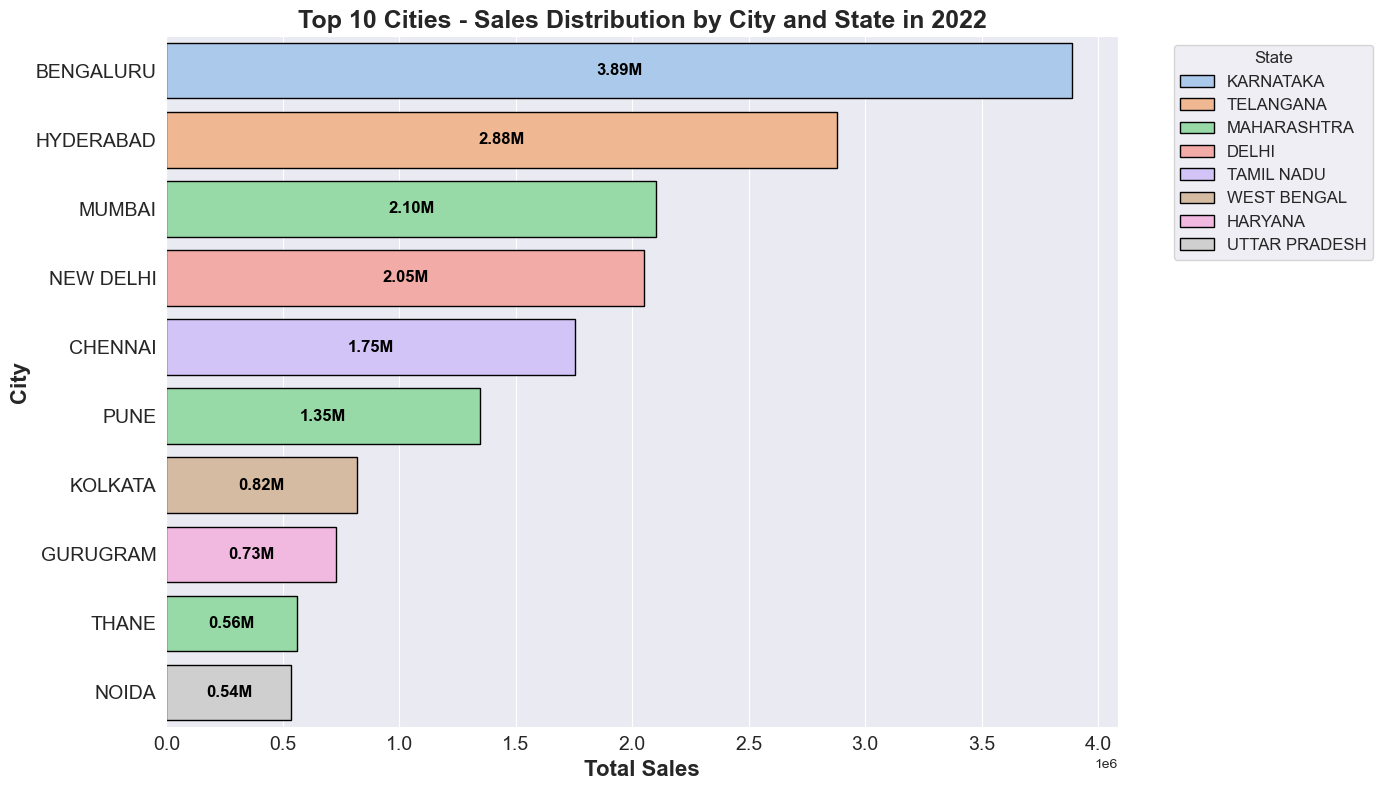

In [21]:
# Group data by city and state, and calculate total sales for each combination
sales_by_location = df_2022.groupby(['City', 'State'])['Amount'].sum().reset_index()

# Sort values in descending order
sales_by_location = sales_by_location.sort_values(by='Amount', ascending=False)

# Filter out cities with zero sales to improve performance
sales_by_location = sales_by_location[sales_by_location['Amount'] > 0]

# Select the top N cities for visualization (adjust N as needed)
N = 10
sales_by_location_topN = sales_by_location.head(N)

# Create a grouped bar chart for sales distribution with a different color palette
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Amount', y='City', hue='State', data=sales_by_location_topN, palette='pastel', dodge=False, edgecolor='black')

# Add data labels to the bars at the middle
for p in ax.patches:
    if not np.isnan(p.get_width()):  # Check for NaN values
        label = f'{p.get_width() / 1e6:.2f}M'
        ax.annotate(label,
                    (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', fontsize=12, color='black', fontweight='bold')

# Customize chart aesthetics
plt.title(f'Top {N} Cities - Sales Distribution by City and State in 2022', fontsize=18, fontweight='bold')
plt.xlabel('Total Sales', fontsize=16, fontweight='bold')
plt.ylabel('City', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Move legend outside the graph
plt.legend(title='State', title_fontsize='12', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to prevent clipping of legend
plt.show()



Order Status Analysis:

Question: What is the distribution of order statuses (e.g., completed, canceled)?

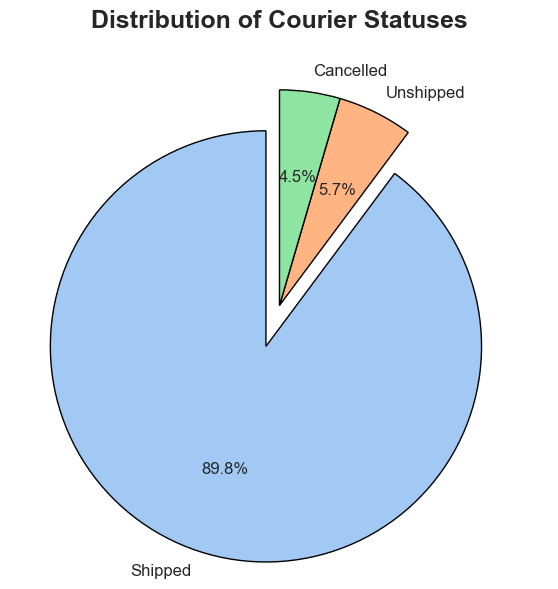

In [22]:
# Assuming your DataFrame is named 'df_2022'
order_status_distribution = df_2022['Courier Status'].value_counts()

# Calculate the explode values to highlight the 'Shipped' wedge
explode_values = [0.2 if status == 'Shipped' else 0 for status in order_status_distribution.index]

# Create a larger pie chart
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(order_status_distribution, labels=order_status_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90, explode=explode_values, wedgeprops=dict(edgecolor='black'))

# Increase the font size of labels and percentages
for text in texts + autotexts:
    text.set_fontsize(12)

# Customize chart aesthetics
plt.title('Distribution of Courier Statuses', fontsize=18, fontweight='bold')

plt.show()





<span style="font-size: 24px; font-family: Times New Roman, sans-serif;"><b>Conclusion</b></span></br></br>

<span style="font-size: 17px; font-family: Times New Roman, sans-serif;">
<b>1: Which product categories contribute the most to the sales in 2022?</b></br>

The sales analysis for 2022 highlights the noteworthy contributions of various product categories. Notably, the 'Set' category emerges as the leading contributor to overall revenue, showcasing a substantial market presence. 'Blouse' and 'Dress' follow closely, underscoring their significance in the sales landscape. While 'Bottom,' 'Scarf,' and 'Top' also contribute, the preeminent position of 'Set,' 'Blouse,' and 'Dress' categories emphasizes their strategic importance in the sales portfolio.</span></br></br>


<span style="font-size: 17px; font-family: Times New Roman, sans-serif;">

<b>2: How do different fulfillment methods and shipment types impact sales?</b></br>

An examination of different fulfillment methods and shipment types reveals distinct patterns in sales impact. Sales with 'Amazon' fulfillment and 'Expedited' shipment type demonstrate a significant influence on the total revenue, underlining the effectiveness of this combination. Concurrently, 'Merchant' fulfillment, particularly when paired with 'Standard' shipment type, plays a role in revenue generation, albeit with a more measured impact.</span></br></br>


<span style="font-size: 17px; font-family: Times New Roman, sans-serif;">

<b>3: What are the top-selling products in terms of quantity or revenue?</b></br>

Delving into the top-selling products for 2022 unveils key performers driving both revenue and quantity metrics. Products such as 'J0230-SKD-M,' 'JNE3797-KR-L,' and 'JNE3797-KR-S' consistently emerge as frontrunners in terms of both sales and overall market demand. The sustained success of 'JNE3797-KR-L' and 'JNE3797-KR-S' underscores their resilience and popularity across diverse customer segments.</span></br></br>


<span style="font-size: 17px; font-family: Times New Roman, sans-serif;">

<b>4: How are sales distributed across different cities, states, and countries?</b></br>

Geographical analysis showcases a diverse distribution of sales across various cities, states, and regions. 'BENGALURU' in 'KARNATAKA' emerges as the top revenue-generating location, closely followed by 'HYDERABAD' in 'TELANGANA' and 'MUMBAI' in 'MAHARASHTRA.' This geographical distribution highlights the importance of tailoring marketing and distribution strategies to the unique dynamics of each location.</span></br></br>


<span style="font-size: 17px; font-family: Times New Roman, sans-serif;">

<b>5: What is the distribution of order statuses (e.g., completed, canceled)?</b></br>
The distribution of order statuses provides valuable insights into the efficiency of the order fulfillment process. The majority of orders fall under the 'Shipped' status, reflecting a robust and successful completion of transactions. 'Unshipped' orders constitute a smaller proportion, while 'Cancelled' orders remain a limited occurrence. These findings underscore the overall positive health of the order fulfillment process, with the vast majority of transactions successfully reaching completion.</span></br></br>
